Cuaderno de trabajo de:
 - _Piloto_ : Solución oficial

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt


### Ejercicio 1

El gasto de una persona en la cafetería del ferry es aleatorio y sigue una distribución exponencial con media de 3 euros.

 - Simula la media y la varianza del gasto total de un pasaje de 300 personas, asumiendo que su gasto es independiente.
 - Compara esos valores con valores obtenidos teóricamente para la media y la varianza del gasto total.
 - Razona si es adecuado aplicar el teorema central del límite para aproximar el gasto total (en una celda markdown).

In [2]:
Gasto1persona = st.expon(scale=3)
def gasto_total():
    gasto300 = Gasto1persona.rvs(300)
    return sum(gasto300)

N = 1000 # tamaño de la muestra
muestra = [gasto_total() for _ in range(N)]
media = sum(muestra)/N
var = sum((x-media)**2 for x in muestra)/N
std = var**0.5
media, var

(901.6499112131559, 2378.2556978956536)

 - El gasto de las 300 personas es la suma de las variables aleatorias Gi que representan el gasto de cada persona: GT = G1 + ... + G300
 - La esperanza de una suma de VA es la suma de las esperanzas, luego E[G1 + ... + G300] = E[G1] + ... + E[G300] = 300 * 3 = 900, ya que el gasto de cualquier persona sigue la misma distribución, Exp(scale=3), que tiene media 3.
 - Como los gastos de las 300 personas son independientes, la varianza de la suma es la suma de las varianzas, luego Var[G1 + ... + G300] = Var[G1] + ... + Var[G300] = 300 * 9 = 2700.

Los números son similares a los obtenidos empíricamente.

 - Dado que el gasto de las 300 personas es una suma de VA independientes, es posible aplicar el teorema central del límite, y aproximar el gasto total por una distribución normal con las mismas media y varianza que la suma de VAs. Con un número de 300 VAs, la aproximación es buena

Comentarios: 
 - En este caso, además, tienen la misma distribución (son _idénticamente distribuídas_), que no es imprescindible para aplicar algunas versiones del teorema central del límite, pero simplifica el análisis.
 - El TCL dice que se puede aproximar _la variable aleatoria suma_ por una Normal, pero no el gasto de cada individuo. En este caso, no se puede aproximar una Exponencial por una Normal, que podeís ver que tienen una función de densidad muy distinta...

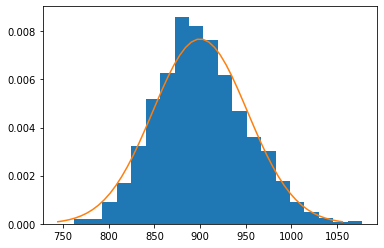

In [3]:
## Ilustración (no se pedía)
plt.hist(muestra, density=True, bins=20)
mediaGT = 3*300
stdGT = (9*300)**0.5
N = st.norm(loc=mediaGT, scale=stdGT)
xs = np.linspace(mediaGT - 3*stdGT, mediaGT + 3*stdGT)
ys = N.pdf(xs)
plt.plot(xs, ys)

### Ejercicio 2

Cargamos un conjunto de datos sobre clientes de un restaurante. Los registros incluyen la factura total (`'total_bill'`) y la propina (`'tip'`).

 - La sintaxis `tips = pd.read_csv('tips.csv')` carga el archivo de datos `'tips.csv'` y construye un `DataFrame`: un objeto que representa la misma información que el archivo de datos.
 - La sintaxis `total_bill = tips["total_bill"]` extrae una sóla columna del `DataFrame`.
 - La sintaxis `total_bill.mean()` calcula la media de la serie de datos `total_bill`.

Se pide:

 - Calcula las varianzas y covarianzas de la factura total y de la propina.
 - Construye la distribución normal que tiene la misma media y la misma varianza que la suma de la factura y la propina (_en el cuaderno `distribuciones2D` puedes encontrar la sintaxis para calcular la covarianza de dos series de datos_).
 - Razona si es adecuado aplicar el teorema central del límite para aproximar el gasto total (en una celda markdown).

In [4]:
import pandas as pd
tips = pd.read_csv('tips.csv')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [5]:
total_bill = tips["total_bill"]
total_bill.mean()

19.78594262295082

Había varias formas de calcular las cantidades pedidas, las he dado todas por buenas...

In [6]:
# Apartado 1
mtip, mbill = tips[['tip', 'total_bill']].mean()
sigma = tips[['tip', 'total_bill']].cov()
vartip = sigma.loc['tip', 'tip']
varbill = sigma.loc['total_bill', 'total_bill']
covtipbill = sigma.loc['total_bill', 'tip']
print('varianza de la factura total:', varbill)
print('varianza de la propina:', vartip)
print('covarianza de la factura total y de la propina:', covtipbill)
# Apartado 2
meansum = mtip + mbill
## Var[X + Y ] = Var[X] + Var[Y] + 2*Cov[X,Y]
varsum = vartip + varbill + 2*covtipbill
stdsum = varsum**0.5
N = st.norm(loc=meansum, scale=stdsum)
print('distribución normal que tiene la misma media y la misma varianza',
      ' que la suma de la factura y la propina: Normal con media',
      meansum,
      'y std',
      stdsum
     )

varianza de la factura total: 79.25293861397829
varianza de la propina: 1.914454638062473
covarianza de la factura total y de la propina: 8.323501629224854
distribución normal que tiene la misma media y la misma varianza  que la suma de la factura y la propina: Normal con media 22.78422131147541 y std 9.890116101972234


In [7]:
### Alternativa Apartado 2
suma = tips['tip'] + tips['total_bill']
meansum = np.mean(suma)
varsum = np.var(suma)
stdsum = varsum**0.5
N = st.norm(loc=meansum, scale=stdsum)
print('distribución normal que tiene la misma media y la misma varianza',
      ' que la suma de la factura y la propina: Normal con media',
      meansum,
      'y std',
      stdsum
     )

distribución normal que tiene la misma media y la misma varianza  que la suma de la factura y la propina: Normal con media 22.784221311475413 y std 9.869828662964071


No se puede aplicar el TCL para aproximar la suma de la factura y la propina por una distribución Normal porque no son VA independientes. Sabemos que no son independientes porque su covarianza no es cero. Además, se trata de sólo dos VA, y el TCL habla de una suma de muchas VAs...

In [8]:
## Ilustración (no se pedía)
plt.hist(suma, density=True)
xs = np.linspace(meansum - 3*stdsum, meansum + 3*stdsum)
ys = N.pdf(xs)
plt.plot(xs, ys)